In [1]:
import numpy as np
import matplotlib.pyplot as plt

import healpy as hp
import nifty7 as ift

import scipy

import os
import sys
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

#import nifty8 as ift
from scipy import interpolate
import copy

**Put the path where the software is stored** 

In [2]:
soft_path = "/home/belen/Doctorado/ML/polarizacion/inhomogeneo/soft/" #put software path

In [3]:
sys.path.append(os.path.abspath(soft_path + "source/"))

In [4]:
import utilities
import wf_noise as wf

2024-11-26 19:17:10.480713: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
Lsize = 20
nx = 256
d2r = np.pi/180.
dx = Lsize*d2r / float(nx)# size of pixels in radians
dx_grad = Lsize/float(nx)
resolution = Lsize*60/float(nx) #arcmin

In [6]:
print('lmax:', (1/dx)*np.pi)

lmax: 2304.0


**Put the path where the data and results are stored** 

In [34]:
mask_mode = 1
data_folder = soft_path + "data/"
result_folder = soft_path + "results/"

if mask_mode == 0:
    sim_noise = np.load(data_folder + 'dataset_test_r01_planck1_mask1.npy')
    sim_noiseless = np.load(data_folder + 'dataset_test_noiseless_r01_planck1_mask1.npy')
else: 
    sim_noise = np.load(data_folder + 'dataset_test_r01_planck1_mask2.npy')
    sim_noiseless = np.load(data_folder + 'dataset_test_noiseless_r01_planck1_mask2.npy')


In [9]:
variance_map = np.load(data_folder + 'variance_QU_planck.npy')
variance_bmap = np.load(data_folder + 'variance_mapB_planck.npy')

masks = np.load(data_folder + 'masks_QU.npy')
if mask_mode == 0: 
    mask = masks[0]
else:
    mask = masks[1]


In [25]:
qobs = sim_noise[:,:,:,0]
uobs = sim_noise[:,:,:,1]
mask = sim_noise[0,:,:,2]
inho = sim_noise[0,:,:,3]
esky = sim_noiseless[:,:,:,0]
bsky = sim_noiseless[:,:,:,1]
qsky = sim_noiseless[:,:,:,2]
usky = sim_noiseless[:,:,:,3]

Text(0.5, 1.0, 'Bsky')

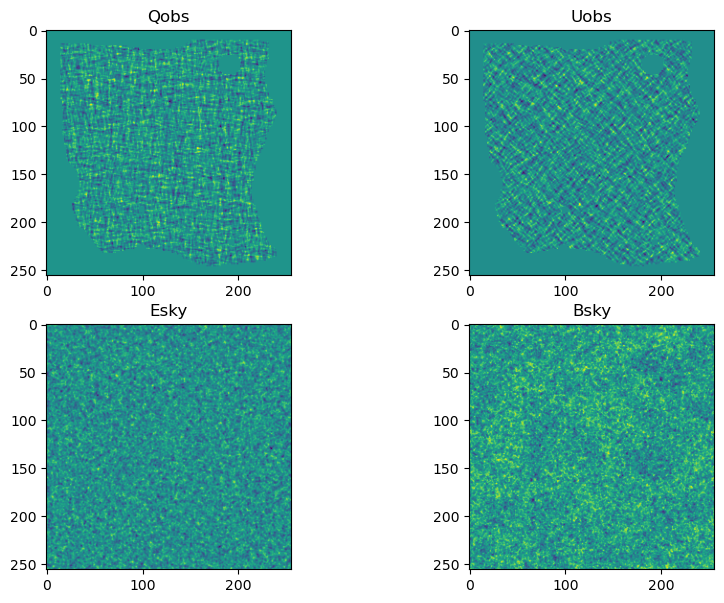

In [11]:
fig, ax = plt.subplots(2,2, figsize=(10,7))

ax[0,0].imshow(qobs[0])
ax[0,0].set_title('Qobs')
ax[0,1].imshow(uobs[0])
ax[0,1].set_title('Uobs')
ax[1,0].imshow(esky[0])
ax[1,0].set_title('Esky')
ax[1,1].imshow(bsky[0])
ax[1,1].set_title('Bsky')

**Read the wf results calculated with the CG using the script CG_inho.py** 

In [26]:
if mask_mode == 0:

    bwf_mask1 = np.load(result_folder + 'wf_CG_mapasB_planck1_eps.npy')
    ewf_mask1 = np.load(result_folder + 'wf_CG_mapasE_planck1_eps.npy')
    
else: 
    
    bwf_mask2 = np.load(result_folder + 'wf_CG_mapasB_planck1_eps_mask2.npy')
    ewf_mask2 = np.load(result_folder + 'wf_CG_mapasE_planck1_eps_mask2.npy')

**Read the DeepWiener results depending of the mask (Mask1/Mask2) employed** 

In [27]:
name_result_cnn1_mask1 = 'mask1/result_filters0_16_filters1_16_filters2_16_lr_3.36e-05_mask1.npy'
name_result_cnn2_mask1 = 'mask1/result_res1_filters0_16_filters1_16_filters2_16_lr_3.36e-05_mask1.npy'
name_result_cnn3_mask1 = 'mask1/result_res2_filters0_16_filters1_16_filters2_16_lr_3.36e-05_mask1.npy'
name_result_cnn4_mask1 = 'mask1/result_res3_filters0_16_filters1_16_filters2_16_lr_3.36e-05_mask1.npy'
name_result_cnnb_mask1 = 'mask1/result_bdata_filters0_16_filters1_16_filters2_16_lr_3.36e-05_mask1.npy'

name_result_cnn1_mask2 = 'mask2/result_filters0_16_filters1_16_filters2_16_lr_3.36e-05_mask2.npy'
name_result_cnn2_mask2 = 'mask2/result_res1_filters0_16_filters1_16_filters2_16_lr_3.36e-05_mask2.npy'
name_result_cnn3_mask2 = 'mask2/result_res2_filters0_16_filters1_16_filters2_16_lr_3.36e-05_mask2.npy'
name_result_cnn4_mask2 = 'mask2/result_res3_filters0_16_filters1_16_filters2_16_lr_3.36e-05_mask2.npy'
name_result_cnn5_mask2 = 'mask2/result_res4_filters0_16_filters1_16_filters2_16_lr_3.36e-05_mask2.npy'
name_result_cnnb_mask2 = 'mask2/result_bdata_filters0_16_filters1_16_filters2_16_lr_3.36e-05_mask2.npy'



if mask_mode == 0: 
    
    result_cnn1_mask1 = np.load(result_folder + name_result_cnn1_mask1)
    result_cnn2_mask1 = np.load(result_folder + name_result_cnn2_mask1)
    result_cnn3_mask1 = np.load(result_folder + name_result_cnn3_mask1)
    result_cnn4_mask1 = np.load(result_folder + name_result_cnn4_mask1)
    result_cnnb_mask1 = np.load(result_folder + name_result_cnnb_mask1)

else: 
    
    result_cnn1_mask2 = np.load(result_folder + name_result_cnn1_mask2)
    result_cnn2_mask2 = np.load(result_folder + name_result_cnn2_mask2)
    result_cnn3_mask2 = np.load(result_folder + name_result_cnn3_mask2)
    result_cnn4_mask2 = np.load(result_folder + name_result_cnn4_mask2)
    result_cnn5_mask2 = np.load(result_folder + name_result_cnn5_mask2)
    result_cnnb_mask2 = np.load(result_folder + name_result_cnnb_mask2)


In [33]:
np.shape(result_cnnb_mask1)

(10, 256, 256, 1)

In [28]:
tfac = np.sqrt((dx*dx)/(nx*nx))

efft, bfft = utilities.transf_eb(qobs, uobs, nx, dx)
eobs = np.fft.irfft2(efft[:,:])/tfac
bobs = np.fft.irfft2(bfft[:,:])/tfac

In [35]:
def get_EB_modes(result_cnn):
    
    qcnn = result_cnn[:,:,:,0]
    ucnn = result_cnn[:,:,:,1]
    
    tfac = np.sqrt((dx*dx)/(nx*nx))
    
    efft, bfft = utilities.transf_eb(qcnn, ucnn, nx, dx)
    ecnn = np.fft.irfft2(efft[:,:])/tfac
    bcnn = np.fft.irfft2(bfft[:,:])/tfac
    
    qecnn, uecnn = utilities.transf_qu_eb(ecnn, bcnn, nx, dx, only_e=True, only_b=False)  
    
    return ecnn, bcnn, qecnn, uecnn, qcnn, ucnn

if mask_mode == 0: 
    ecnn_1_mask1, _, qecnn1_mask1, uecnn1_mask1, qcnn1_mask1, ucnn1_mask1 = get_EB_modes(result_cnn1_mask1)
    _,_,qecnn2_mask1, uecnn2_mask1, qcnn2_mask1, ucnn2_mask1 = get_EB_modes(result_cnn2_mask1)
    _,_,qecnn3_mask1, uecnn3_mask1, qcnn3_mask1, ucnn3_mask1 = get_EB_modes(result_cnn3_mask1)
    _,bcnn4_mask1, qecnn4_mask1, uecnn4_mask1, qcnn4_mask1, ucnn4_mask1 = get_EB_modes(result_cnn4_mask1)
    bcnn_modelb_mask1 = result_cnnb_mask1[:,:,:,0]
    
    qtotal = qecnn1_mask1 + qecnn2_mask1 + qecnn3_mask1 + qcnn4_mask1 
    utotal = uecnn1_mask1 + uecnn2_mask1 + uecnn3_mask1 + ucnn4_mask1 

    efft_2,_ = utilities.transf_eb(qecnn1_mask1+qcnn2_mask1, uecnn1_mask1+ucnn2_mask1, nx, dx)
    ecnn_2_mask1 = np.fft.irfft2(efft_2)/tfac

    efft_3,_ = utilities.transf_eb(qecnn1_mask1+qecnn2_mask1+qcnn3_mask1, uecnn1_mask1+uecnn2_mask1+ucnn3_mask1, nx, dx)
    ecnn_3_mask1 = np.fft.irfft2(efft_3)/tfac

    efft_tot,_ = utilities.transf_eb(qtotal, utotal, nx, dx)
    ecnn_tot_mask1 = np.fft.irfft2(efft_tot)/tfac

    bcnn_modelqu_mask1 = bcnn4_mask1
        
else: 
    ecnn_1_mask2,_,qecnn1_mask2, uecnn1_mask2, qcnn1_mask2, ucnn1_mask2 = get_EB_modes(result_cnn1_mask2)
    _,_,qecnn2_mask2, uecnn2_mask2, qcnn2_mask2, ucnn2_mask2 = get_EB_modes(result_cnn2_mask2)
    _,_,qecnn3_mask2, uecnn3_mask2, qcnn3_mask2, ucnn3_mask2 = get_EB_modes(result_cnn3_mask2)
    _,_,qecnn4_mask2, uecnn4_mask2, qcnn4_mask2, ucnn4_mask2 = get_EB_modes(result_cnn4_mask2)
    _,bcnn5_mask2, qecnn5_mask2, uecnn5_mask2, qcnn5_mask2, ucnn5_mask2 = get_EB_modes(result_cnn5_mask2)
    bcnn_modelb_mask2 = result_cnnb_mask2[:,:,:,0]
    
    qtotal = qecnn1_mask2 + qecnn2_mask2 + qecnn3_mask2 + qecnn4_mask2 + qcnn5_mask2
    utotal = uecnn1_mask2 + uecnn2_mask2 + uecnn3_mask2 + uecnn4_mask2 + ucnn5_mask2

    efft_2,_ = utilities.transf_eb(qecnn1_mask2+qcnn2_mask2, uecnn1_mask2+ucnn2_mask2, nx, dx)
    ecnn_2_mask2 = np.fft.irfft2(efft_2)/tfac

    efft_3,_ = utilities.transf_eb(qecnn1_mask2+qecnn2_mask2+qcnn3_mask2, uecnn1_mask2+uecnn2_mask2+ucnn3_mask2, nx, dx)
    ecnn_3_mask2 = np.fft.irfft2(efft_3)/tfac
    
    efft_4,_ = utilities.transf_eb(qecnn1_mask2+qecnn2_mask2+qecnn3_mask2+qcnn4_mask2, uecnn1_mask2+uecnn2_mask2+uecnn3_mask2+ucnn4_mask2, nx, dx)
    ecnn_4_mask2 = np.fft.irfft2(efft_4)/tfac

    efft_tot,_ = utilities.transf_eb(qtotal, utotal, nx, dx)
    ecnn_tot_mask2 = np.fft.irfft2(efft_tot)/tfac

    bcnn_modelqu_mask2 = bcnn5_mask2

In [30]:
def calculate_correlation(mapcnn, mapwf, bins):
    
    rl_cnnwf = np.zeros((10,len(bins)-1))
    for i in range(10):
        qpower_cnn = utilities.powerauto(mapcnn[i], nx, dx)
        qpower_wf = utilities.powerauto(mapwf[i], nx, dx)
        qpower_cnn_wf = utilities.power_cross(mapcnn[i], mapwf[i], nx, dx)
        rl_cnnwf[i] = utilities.cross_correlation(ell_flat, qpower_cnn_wf, qpower_wf, qpower_cnn, bin_edges)
    
    rl_mean_cnnwf = np.mean(rl_cnnwf, axis=0)
    return rl_mean_cnnwf

In [31]:
lmin=2
lmax=3200

_,_,bin_edges = utilities.compute_bins(lmin,lmax,Nbins=100)

Total number of modes in (l_min,l_max) =  10246397.0
Number of modes in each bin =  102463.97


In [18]:
cl_ee_camb, cl_bb_camb = utilities.signal_spectrum()  #angular power spectrum 
ell_flat, cl_ee, cl_bb = utilities.power_spectrum_flat(cl_ee_camb, cl_bb_camb, nx, dx) #flat power spectrum

In [19]:
el_binb, cl_binb, count = utilities.bin_power(ell_flat, cl_bb, bin_edges) #bin power spectrum
el_bine, cl_bine, count = utilities.bin_power(ell_flat, cl_bb, bin_edges)

In [32]:
rle_mean_cnnwf_1_mask1 = calculate_correlation(ecnn_1_mask1, ewf_mask1, bin_edges)
rle_mean_cnnwf_2_mask1 = calculate_correlation(ecnn_2_mask1, ewf_mask1, bin_edges)
rle_mean_cnnwf_3_mask1 = calculate_correlation(ecnn_3_mask1, ewf_mask1, bin_edges)
rle_mean_cnnwf_4_mask1 = calculate_correlation(ecnn_tot_mask1, ewf_mask1, bin_edges)

rlb_mean_cnnwf_qu_mask1 = calculate_correlation(bcnn_modelqu_mask1, bwf_mask1, bin_edges)
rlb_mean_cnnwf_b_mask1 = calculate_correlation(bcnn_modelb_mask1, bwf_mask1, bin_edges)
rlb_mean_obswf = calculate_correlation(bobs, bwf_mask1, bin_edges)

In [36]:
rle_mean_cnnwf_1_mask2 = calculate_correlation(ecnn_1_mask2, ewf_mask2, bin_edges)
rle_mean_cnnwf_2_mask2 = calculate_correlation(ecnn_2_mask2, ewf_mask2, bin_edges)
rle_mean_cnnwf_3_mask2 = calculate_correlation(ecnn_3_mask2, ewf_mask2, bin_edges)
rle_mean_cnnwf_4_mask2 = calculate_correlation(ecnn_4_mask2, ewf_mask2, bin_edges)

rle_mean_cnnwf_5_mask2 = calculate_correlation(ecnn_tot_mask2, ewf_mask2, bin_edges)

rlb_mean_cnnwf_qu_mask2 = calculate_correlation(bcnn_modelqu_mask2, bwf_mask2, bin_edges)
rlb_mean_cnnwf_b_mask2 = calculate_correlation(bcnn_modelb_mask2, bwf_mask2, bin_edges)
rlb_mean_obswf_mask2 = calculate_correlation(bobs, bwf_mask2, bin_edges)

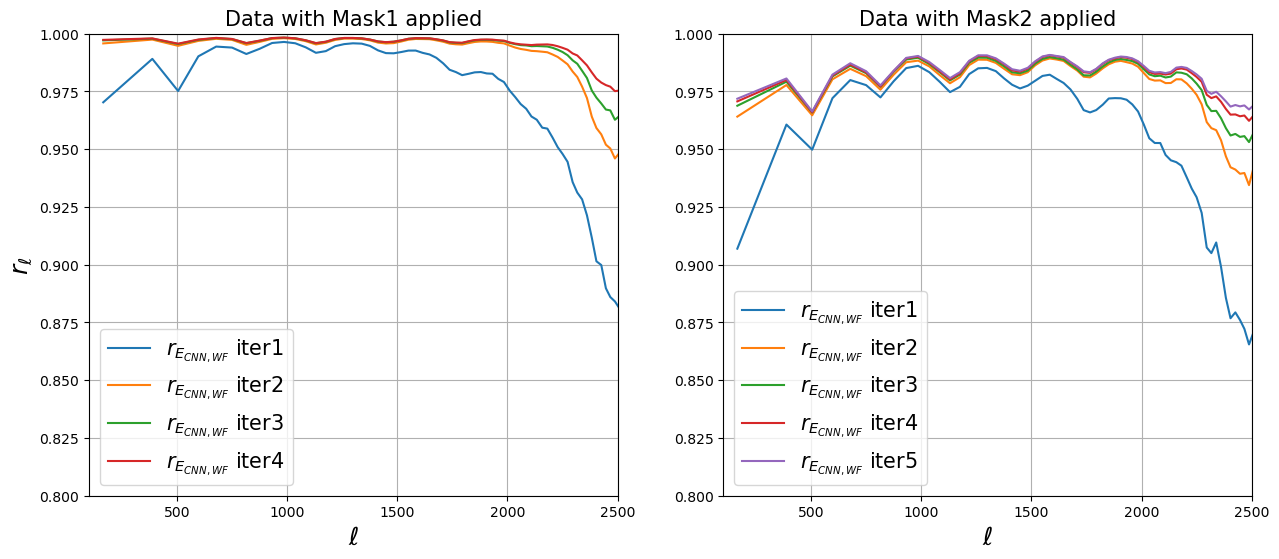

In [37]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].plot(el_bine, rle_mean_cnnwf_1_mask1, label=r'$r_{E_{CNN,WF}}$ iter1')
ax[0].plot(el_bine, rle_mean_cnnwf_2_mask1, label=r'$r_{E_{CNN,WF}}$ iter2')
ax[0].plot(el_bine, rle_mean_cnnwf_3_mask1, label=r'$r_{E_{CNN,WF}}$ iter3')
ax[0].plot(el_bine, rle_mean_cnnwf_4_mask1, label=r'$r_{E_{CNN,WF}}$ iter4')

ax[1].plot(el_bine, rle_mean_cnnwf_1_mask2, label=r'$r_{E_{CNN,WF}}$ iter1')
ax[1].plot(el_bine, rle_mean_cnnwf_2_mask2, label=r'$r_{E_{CNN,WF}}$ iter2')
ax[1].plot(el_bine, rle_mean_cnnwf_3_mask2, label=r'$r_{E_{CNN,WF}}$ iter3')
ax[1].plot(el_bine, rle_mean_cnnwf_4_mask2, label=r'$r_{E_{CNN,WF}}$ iter4')
ax[1].plot(el_bine, rle_mean_cnnwf_5_mask2, label=r'$r_{E_{CNN,WF}}$ iter5')

ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)
ax[0].set_ylim(0.8,1)
ax[1].set_ylim(0.8,1)
ax[0].set_xlim(100,2500)
ax[1].set_xlim(100,2500)
ax[0].grid()
ax[1].grid()
ax[0].set_title('Data with Mask1 applied', fontsize=15)
ax[1].set_title('Data with Mask2 applied', fontsize=15)

ax[0].set_ylabel(r'$r_{\ell}$', fontsize=18)
ax[0].set_xlabel(r'$\ell$', fontsize=18)
ax[1].set_xlabel(r'$\ell$', fontsize=18)

plt.savefig('corr_ecnn_mask1_mask2_test.pdf', bbox_inches='tight')

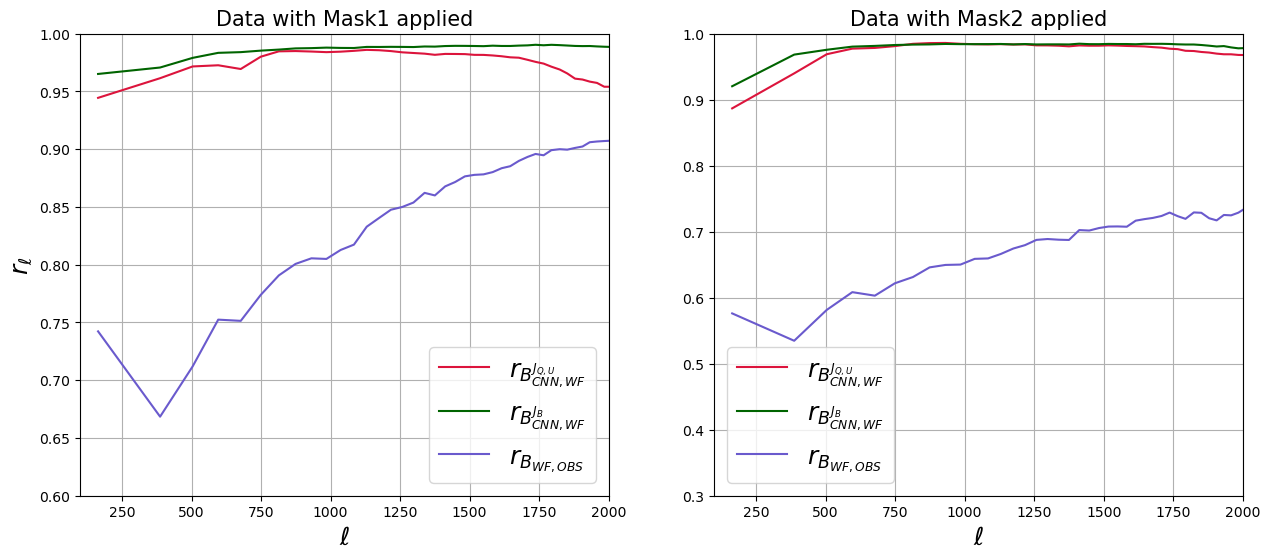

In [39]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(el_binb, rlb_mean_cnnwf_qu_mask1, color='crimson', label=r'$r_{B^{J_{Q,U}}_{CNN,WF}}$')
ax[0].plot(el_binb, rlb_mean_cnnwf_b_mask1, color='darkgreen', label=r'$r_{B^{J_{B}}_{CNN,WF}}$')
ax[0].plot(el_binb, rlb_mean_obswf, color='slateblue', label=r'$r_{B_{WF,OBS}}$')


ax[1].plot(el_binb, rlb_mean_cnnwf_qu_mask2, color='crimson', label=r'$r_{B^{J_{Q,U}}_{CNN,WF}}$')
ax[1].plot(el_binb, rlb_mean_cnnwf_b_mask2, color='darkgreen', label=r'$r_{B^{J_{B}}_{CNN,WF}}$')
ax[1].plot(el_binb, rlb_mean_obswf_mask2, color='slateblue', label=r'$r_{B_{WF,OBS}}$')

ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[1].set_ylim(0.3,1)
ax[0].set_ylim(0.60,1)
ax[0].set_xlim(100,2000)
ax[1].set_xlim(100,2000)
ax[0].grid()
ax[1].grid()
ax[0].set_title('Data with Mask1 applied', fontsize=15)
ax[1].set_title('Data with Mask2 applied', fontsize=15)

ax[0].set_ylabel(r'$r_{\ell}$', fontsize=18)
ax[1].set_xlabel(r'$\ell$', fontsize=18)
ax[0].set_xlabel(r'$\ell$', fontsize=18)

plt.savefig('corr_bcnn_mask1_mask2_test.pdf', bbox_inches='tight')